# Table of  Contents
1. Data Preprocessing
2. Exploratory Data Analysis and Visualisation
 
   - Top 10 countries with most transactions
   - Sales and Revenue Analysis
   - Customer Analysis
   - Create Basket Data for Customers
   - Data Encoding
3. Apply apriori
   
   - Generate Frequent Itemset
4. Association Rule Mining
   
   - Generate Rules

# Importing Packages

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from pandas.plotting import parallel_coordinates

# Read the data

In [32]:
data = pd.read_excel("online_retail_data.xlsx",engine = "openpyxl")
print("SHAPE OF DATA :",data.shape)
data.head()

SHAPE OF DATA : (525461, 8)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [34]:
data.describe()

,Quantity,Price,Customer ID
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


# Data Preprocessing

In [35]:
#drop null values
data=data.dropna()  
#remove spaces from description
data["Description"]=data["Description"].str.strip()   
#remove negative values from quantity
data.drop(data[data["Quantity"]<=0].index)
#convert invoice to string type
data['Invoice']=data["Invoice"].astype("str")         
#uses bitwise negation operation to remove all the credit transactions
data=data[~data["Invoice"].str.contains("C")] 


In [36]:
# Rename price to Unitprice
data.rename(columns={"Price":"Unitprice"},inplace=True)  
# Adding total price
data["Totalprice"]=data["Unitprice"]*data["Quantity"]   
print("SHAPE OF DATA :",data.shape)
data.head(10)

SHAPE OF DATA : (407695, 9)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Unitprice,Customer ID,Country,Totalprice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom,39.6
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom,59.5
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom,30.6
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom,45.0


In [37]:
data.nunique()

Invoice        19215
StockCode       4017
Description     4406
Quantity         343
InvoiceDate    18010
Unitprice        449
Customer ID     4314
Country           37
Totalprice      2530
dtype: int64

# EDA

###  Top 10 countries with most transactions

In [38]:
def top_transactions(data):
    """
    Input : 
    data: Input dataframe
    ______________________________
    Output: Top 10 Transaction
    _______________________________
    """
    top_10_transaction = pd.DataFrame(data.groupby("Country").nunique().sort_values("Invoice",ascending=False).head(10))
    top_10_transaction.reset_index(inplace=True)
    # Visualize top 10 Countries with Most Transactions
    top_10_transaction.plot(kind="pie", y = "Invoice", autopct="%1.0f%%",labels=top_10_transaction["Country"],
                            figsize=(10,10),title="Top 10 Countries With Most Transactions")
    display(top_10_transaction)

,Country,Invoice,StockCode,Description,Quantity,InvoiceDate,Unitprice,Customer ID,Totalprice
0,United Kingdom,17614,4001,4377,307,16601,366,3971,2359
1,Germany,347,1457,1605,52,346,86,67,388
2,EIRE,316,1999,2150,73,314,119,5,568
3,France,236,1275,1396,94,235,82,47,400
4,Netherlands,135,879,934,60,135,68,22,429
5,Sweden,68,424,441,43,66,51,16,186
6,Spain,66,682,699,35,66,61,25,234
7,Belgium,52,481,520,24,52,55,17,143
8,Switzerland,40,674,718,34,40,61,14,210
9,Australia,40,418,450,37,40,49,15,167


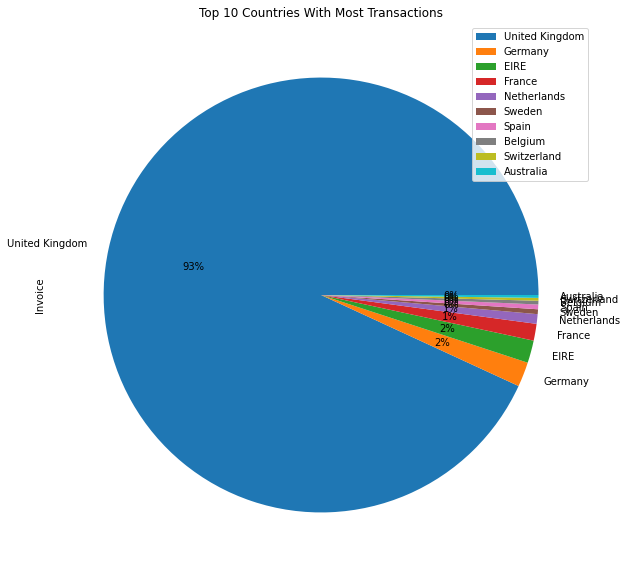

In [39]:
top_transactions(data)

### Top 10 Most Bought Items

In [40]:
def most_bought_items(data):
    """
    Input  : 
    data: Input Dataframe
    ______________________________________________
    Output : Most Bought item in Total Transaction
    _______________________________________________
    """
    df=pd.DataFrame(data.groupby("Description")["Quantity"].sum())
    most_bought=df.sort_values("Quantity", axis = 0, ascending = False)[:10]
    most_bought.reset_index(inplace=True)
    #Visualize Most Bought Items
    most_bought.plot(kind="bar",x="Description",y="Quantity",figsize=(12,6),xlabel="Item_Name",ylabel="Count",title="Most Bought Items")
    display(most_bought)

,Description,Quantity
0,WHITE HANGING HEART T-LIGHT HOLDER,56915
1,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54754
2,BROCADE RING PURSE,48166
3,PACK OF 72 RETRO SPOT CAKE CASES,45156
4,ASSORTED COLOUR BIRD ORNAMENT,44551
5,60 TEATIME FAIRY CAKE CASES,35806
6,PACK OF 60 PINK PAISLEY CAKE CASES,31006
7,JUMBO BAG RED RETROSPOT,29578
8,SMALL POPCORN HOLDER,25718
9,BLACK AND WHITE PAISLEY FLOWER MUG,25685


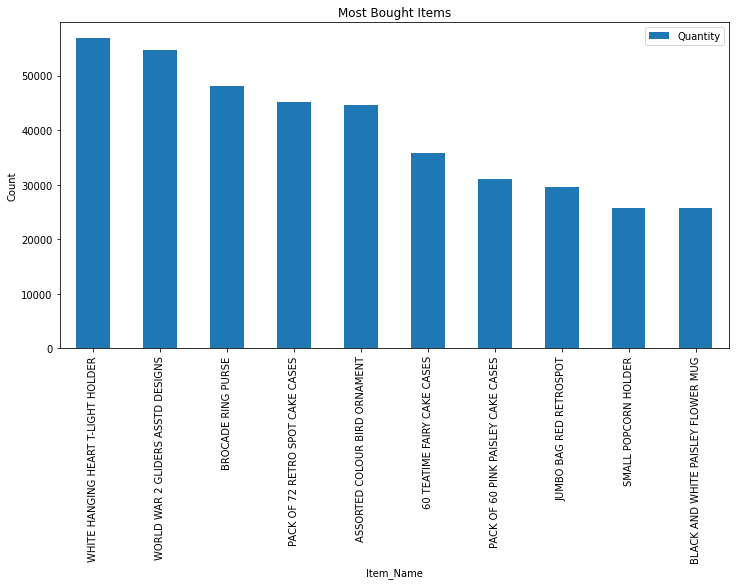

In [41]:
most_bought_items(data)


### Total sales and revenue in months

In [42]:
def sales_in_months(data):
    """
    Input : 
    data: Input Dataframe
    _____________________________
    Output: Sales in each Month
    _____________________________
    """
    total_sales=data.groupby(pd.Grouper(key="InvoiceDate",freq='M')).sum()
    total_sales.reset_index(inplace=True)
    total_sales.drop(["Unitprice","Customer ID"],axis=1,inplace=True)
    display(total_sales)
    total_sales.plot( x="InvoiceDate" , y=["Quantity","Totalprice"],figsize=(12,6),grid=True ,title="Total Sales in Each  Months",style="-o")

,InvoiceDate,Quantity,Totalprice
0,2009-12-31,400201,686654.160
1,2010-01-31,370967,557319.062
2,2010-02-28,372771,506371.066
3,2010-03-31,503467,699608.991
4,2010-04-30,352042,594609.192
5,2010-05-31,386297,599985.790
6,2010-06-30,391682,639066.580
7,2010-07-31,325661,591636.740
8,2010-08-31,453590,604242.650
9,2010-09-30,569265,831615.001


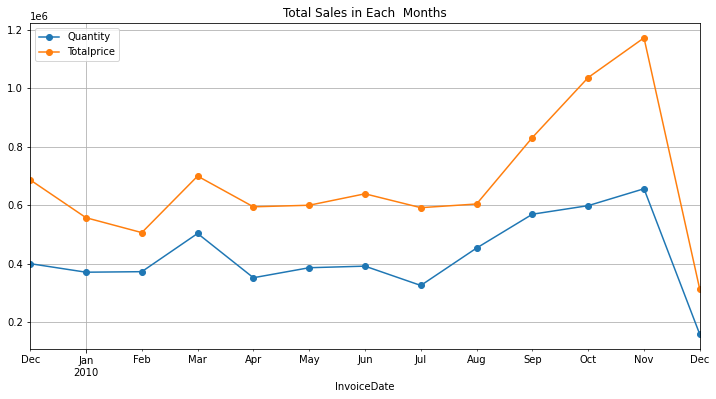

In [43]:
sales=sales_in_months(data)

### Top 10 Customers

,Customer ID,Quantity
0,13902.0,220600
1,14646.0,170342
2,13694.0,125893
3,18102.0,124216
4,14156.0,108107
5,14277.0,87830
6,13687.0,87167
7,17940.0,75825
8,14911.0,69722
9,16754.0,63551


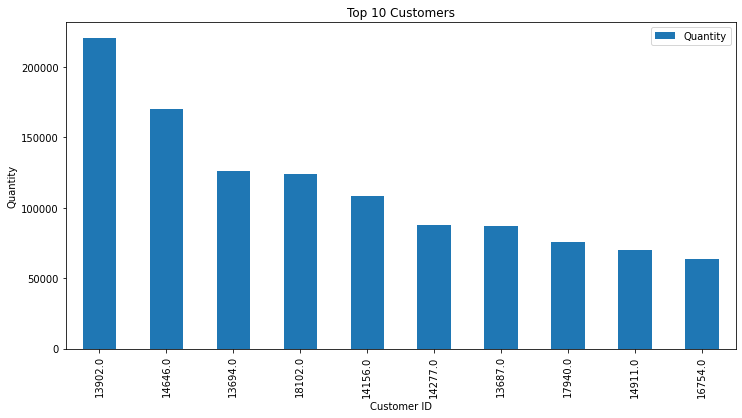

In [44]:
def top_10_customers(data):
    """
    Input : 
    data: Input Dataframe
    _____________________________________________
    Output: Top 10 Customers in whole transaction
    _____________________________________________
    """
    customers=pd.DataFrame(data.groupby("Customer ID")["Quantity"].sum()).sort_values("Quantity", axis = 0, ascending = False)
    customers.reset_index(inplace=True)
    top_customers = customers.head(10)
    top_customers.plot(kind="bar",x="Customer ID",y="Quantity",figsize=(12,6),xlabel="Customer ID",ylabel="Quantity",title="Top 10 Customers")
    display(top_customers)

customer_analysis = top_10_customers(data)

### Sales per Hours 

<AxesSubplot:title={'center':'Total Sales per Hour'}, xlabel='Hour of the day', ylabel='Quantity'>

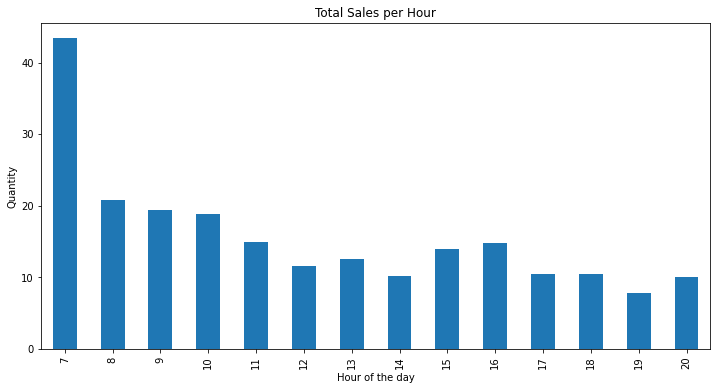

In [45]:
fig= plt.subplots(figsize=(12, 6))
data.groupby(data["InvoiceDate"].dt.hour)["Quantity"].mean().plot(kind='bar',title="Total Sales per Hour",xlabel="Hour of the day",ylabel="Quantity")

# Create Basket Data

### Create a basket  data using transactions from United Kingdom

In [46]:
mybasket = (data[data['Country'] =="United Kingdom"]
          .groupby(['Invoice', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Invoice'))

mybasket.head()

Description,10 COLOUR SPACEBOY PEN,11 PC CERAMIC TEA SET POLKADOT,12 ASS ZINC CHRISTMAS DECORATIONS,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 MINI TOADSTOOL PEGS,12 PENCIL SMALL TUBE WOODLAND,...,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE CHARGER SMALL,ZINC HEART LATTICE DOUBLE PLANTER,ZINC HEART LATTICE PLANTER BOWL,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEART LATTICE TRAY OVAL,ZINC METAL HEART DECORATION,ZINC POLICE BOX LANTERN,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK
Invoice,,,,,,,,,,,,,,,,,,,,,
489434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Encode the Data

### Converting positive values to 1 and negative values to 0

In [47]:
def encoder(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_data = mybasket.applymap(encoder)                        #Apply encoding to dataframe
basket_data.drop("POSTAGE",inplace=True,axis=1)                 # remove POSTAGE item from Transaction           
basket_data = basket_data[(basket_data > 0).sum(axis=1) >= 2]   #filter out the transactions that have bought more than 1 items only
basket_data

Description,10 COLOUR SPACEBOY PEN,11 PC CERAMIC TEA SET POLKADOT,12 ASS ZINC CHRISTMAS DECORATIONS,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 MINI TOADSTOOL PEGS,12 PENCIL SMALL TUBE WOODLAND,...,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE CHARGER SMALL,ZINC HEART LATTICE DOUBLE PLANTER,ZINC HEART LATTICE PLANTER BOWL,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEART LATTICE TRAY OVAL,ZINC METAL HEART DECORATION,ZINC POLICE BOX LANTERN,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK
Invoice,,,,,,,,,,,,,,,,,,,,,
489434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538167,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
538168,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
538169,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Training the model

## Generate Frequent Itemset

In [48]:
def frequent(basket_items):
    """
    Input : 
    basket_items : Items in the basket for each transaction    
    _____________________________________________________
    Output:
    frequent_itemsets: Frequently bought itemset in the whole transaction
    _______________________________________________________
    """
    frequent_data = apriori(basket_items, min_support=0.03, use_colnames=True)
    frequent_itemsets=frequent_data.sort_values("support", axis = 0, ascending = False)
    frequent_itemsets.reset_index(drop=True,inplace = True)
    return frequent_itemsets

In [49]:
frequent_itemset = frequent(basket_data)
frequent_itemset.head()

,support,itemsets
0,0.179612,(WHITE HANGING HEART T-LIGHT HOLDER)
1,0.092420,(REGENCY CAKESTAND 3 TIER)
2,0.077857,(ASSORTED COLOUR BIRD ORNAMENT)
3,0.076799,(STRAWBERRY CERAMIC TRINKET BOX)
4,0.070513,(HOME BUILDING BLOCK WORD)


<AxesSubplot:title={'center':'Top 10 Most Frequently Bought Items'}, xlabel='Item_Name', ylabel='support'>

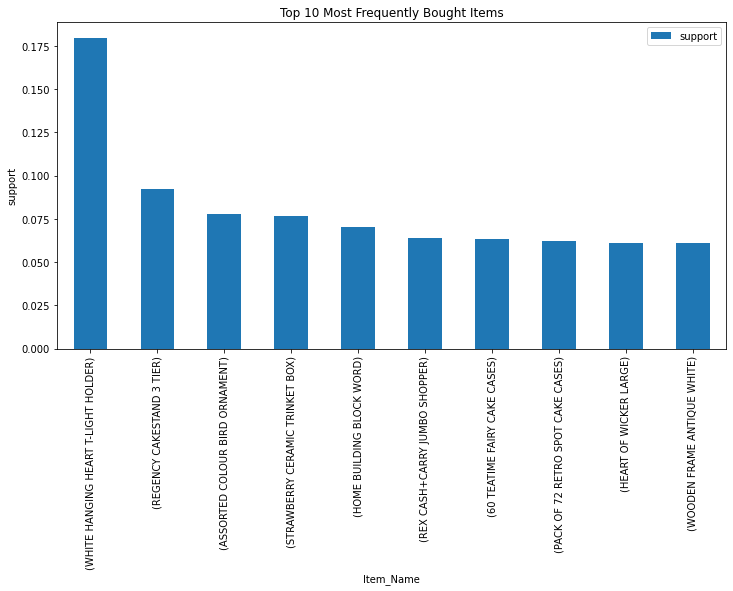

In [50]:
#plot top 10 most frequently bought items
frequent_bought=frequent_itemset.head(10)
frequent_bought.plot(kind="bar",x="itemsets",y="support",figsize=(12,6),xlabel="Item_Name",ylabel="support",
                     title="Top 10 Most Frequently Bought Items")

#### support : 
Frequency of occurance of a itemset in the transaction

#### Confidence :
This says how likely item Y is purchased when item X is purchased, expressed as {X -> Y}. This is                 measured by the  proportion of transactions with item X, in which item Y also appears.

#### Lift :
This says how likely item Y is purchased when item X is purchased while controlling for how popular item Y is.

#### Leverage :
It measures the difference of X and Y appearing together in the data set and what would be expected if X and Y where statistically dependent

### Find association between fequently bought items

In [51]:
rules = association_rules(frequent_itemset, metric="lift", min_threshold=1) 
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(RED HANGING HEART T-LIGHT HOLDER),(WHITE HANGING HEART T-LIGHT HOLDER),0.058750,0.179612,0.042942,0.730932,4.069514,0.032390,3.049002
1,(WHITE HANGING HEART T-LIGHT HOLDER),(RED HANGING HEART T-LIGHT HOLDER),0.179612,0.058750,0.042942,0.239085,4.069514,0.032390,1.236998
2,(SWEETHEART CERAMIC TRINKET BOX),(STRAWBERRY CERAMIC TRINKET BOX),0.047423,0.076799,0.036283,0.765092,9.962314,0.032641,3.930053
3,(STRAWBERRY CERAMIC TRINKET BOX),(SWEETHEART CERAMIC TRINKET BOX),0.076799,0.047423,0.036283,0.472447,9.962314,0.032641,1.805652
4,(WOODEN PICTURE FRAME WHITE FINISH),(WOODEN FRAME ANTIQUE WHITE),0.049104,0.060866,0.033794,0.688213,11.306958,0.030805,3.012099
5,(WOODEN FRAME ANTIQUE WHITE),(WOODEN PICTURE FRAME WHITE FINISH),0.060866,0.049104,0.033794,0.555215,11.306958,0.030805,2.137877
6,(LOVE BUILDING BLOCK WORD),(HOME BUILDING BLOCK WORD),0.057692,0.070513,0.031927,0.553398,7.848191,0.027859,2.081243
7,(HOME BUILDING BLOCK WORD),(LOVE BUILDING BLOCK WORD),0.070513,0.057692,0.031927,0.452780,7.848191,0.027859,1.721991
8,(HEART OF WICKER LARGE),(HEART OF WICKER SMALL),0.061177,0.052838,0.030246,0.494405,9.357005,0.027014,1.873361
9,(HEART OF WICKER SMALL),(HEART OF WICKER LARGE),0.052838,0.061177,0.030246,0.572438,9.357005,0.027014,2.195758


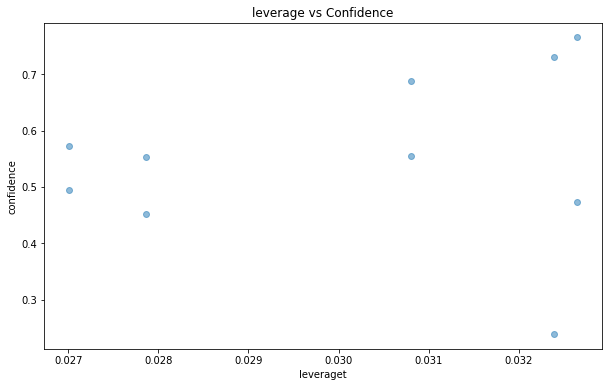

In [52]:
#plot leverage vs confidence
fig=plt.figure(figsize=(10,6))
plt.scatter(rules["leverage"], rules["confidence"], alpha=0.5)
plt.xlabel("leveraget")
plt.ylabel("confidence")
plt.title("leverage vs Confidence")
plt.show()

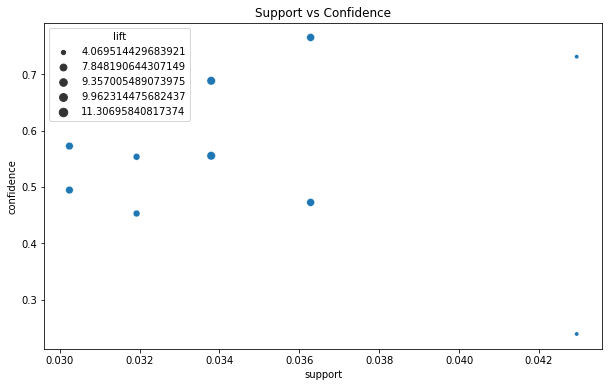

In [53]:
#plot support and confidence
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x="support",y="confidence",data=rules,size="lift")
plt.title("Support vs Confidence")
plt.show()

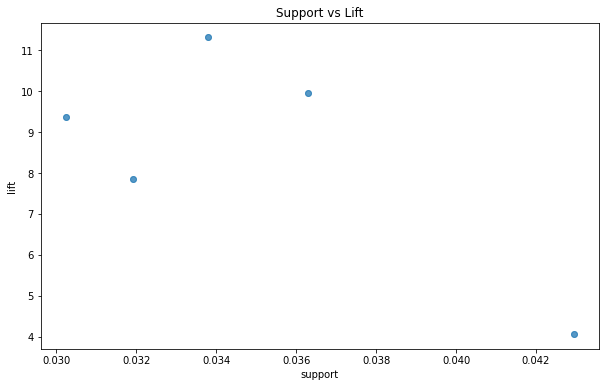

In [54]:
#plot support vs lift
fig=plt.figure(figsize=(10,6))
plt.scatter(rules["support"], rules["lift"], alpha=0.5)
plt.xlabel("support")
plt.ylabel("lift")
plt.title("Support vs Lift")
plt.show()

## Visualise Heatmap with Lift

<AxesSubplot:xlabel='consequents', ylabel='antecedents'>

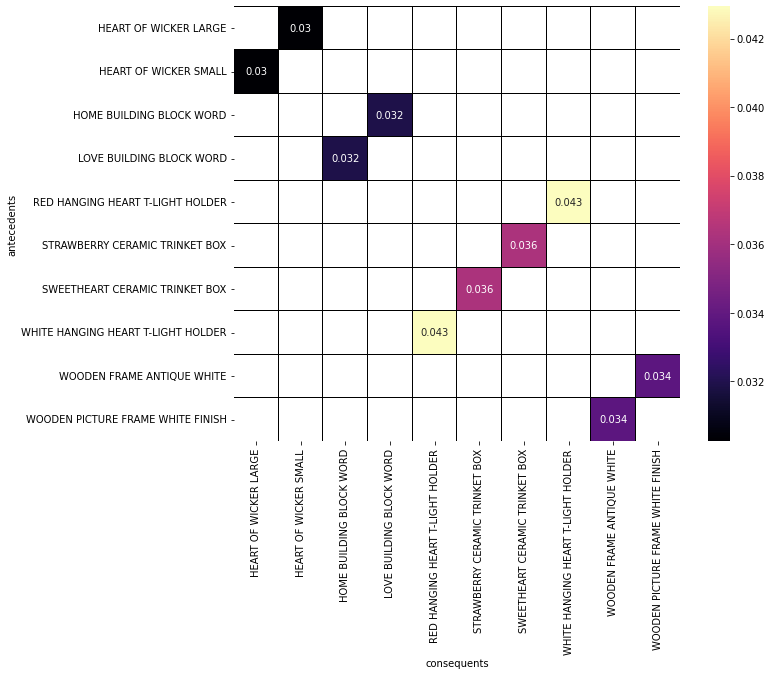

In [55]:
# Convert antecedents and consequents into strings
rules['antecedents'] = rules['antecedents'].apply(lambda a: ' '.join(list(a)))
rules['consequents'] = rules['consequents'].apply(lambda a: ' '.join(list(a)))

    # Relation between association rules represented using Lift value
fig=plt.figure(figsize=(10,8))
rule_data = rules.pivot(index="antecedents",columns="consequents",values="support")
sns.heatmap(rule_data,annot=True,cmap="magma",linecolor="black",linewidths=.01)


## Parallel Coordinate Plot

In [56]:
rules_1 = association_rules(frequent_itemset, metric="lift", min_threshold=1) 
def rules_to_coordinates(rules):
    rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: list(antecedent)[0])
    rules['consequent'] = rules['consequents'].apply(lambda consequent: list(consequent)[0])
    rules['rule'] = rules.index
    return rules[['antecedent','consequent','rule']]

In [57]:
coords = rules_to_coordinates(rules_1)
display("Association Rules",coords)

'Association Rules'

,antecedent,consequent,rule
0,RED HANGING HEART T-LIGHT HOLDER,WHITE HANGING HEART T-LIGHT HOLDER,0
1,WHITE HANGING HEART T-LIGHT HOLDER,RED HANGING HEART T-LIGHT HOLDER,1
2,SWEETHEART CERAMIC TRINKET BOX,STRAWBERRY CERAMIC TRINKET BOX,2
3,STRAWBERRY CERAMIC TRINKET BOX,SWEETHEART CERAMIC TRINKET BOX,3
4,WOODEN PICTURE FRAME WHITE FINISH,WOODEN FRAME ANTIQUE WHITE,4
5,WOODEN FRAME ANTIQUE WHITE,WOODEN PICTURE FRAME WHITE FINISH,5
6,LOVE BUILDING BLOCK WORD,HOME BUILDING BLOCK WORD,6
7,HOME BUILDING BLOCK WORD,LOVE BUILDING BLOCK WORD,7
8,HEART OF WICKER LARGE,HEART OF WICKER SMALL,8
9,HEART OF WICKER SMALL,HEART OF WICKER LARGE,9


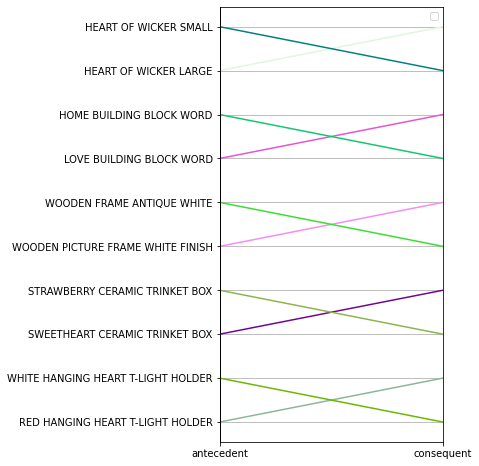

In [58]:
# Generate parallel coordinates plot
plt.figure(figsize=(4,8))
parallel_coordinates(coords, 'rule')
plt.legend([])
plt.grid(True)
plt.show()
